<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-pose-estimation-for-swing-improvement/blob/main/Analyze_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze Swing Demo

This demo shows the usage of swing analyzer we developed as a part of our project. It requires a video a golfer swinging from the front which is then analyzed and evaluated. This analysis should serve as a sort of 'virtual trainer' giving you information about the mistakes made in the swing to improve your technique. The output of our work is 3 frames detected in the video, which contain the main swing parts that are generally analyzed in golf. In these frames, body parts, angles and different positions are marked either red or green based on the set limits they should ideally be within.

## Clone our repository

To use our model, first we need to clone our repository where the different classes and functions are.

In [1]:
!git clone https://github.com/Strojove-uceni/23206-final-pose-estimation-for-swing-improvement


Cloning into '23206-final-pose-estimation-for-swing-improvement'...
remote: Enumerating objects: 4081, done.
remote: Counting objects: 100% (1415/1415), done.
remote: Compressing objects: 100% (1222/1222), done.
remote: Total 4081 (delta 393), reused 1201 (delta 193), pack-reused 2666
Receiving objects: 100% (4081/4081), 1.40 GiB | 24.54 MiB/s, done.
Resolving deltas: 100% (600/600), done.
Updating files: 100% (1433/1433), done.


## Load the model and evaluation functions

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/23206-final-pose-estimation-for-swing-improvement')
from process_swing import DataProcessor, Evaluator, VideoProcessor

## Define the path to video

In [9]:
# Define the folder path where your video and CSV files are located
folder_path = '/content/23206-final-pose-estimation-for-swing-improvement'+'/test_classes'

## Step 1: Using DataProcessor
DataPreprocessor preprocesses the output of the model and keeps only information about the 3 frames that we are analyzing.


In [10]:
data_processor = DataProcessor(folder_path)
data_processor.load_data()
data_processor.preprocess_data()

## Step 2: Evaluator
Evaluator uses the preprocessed data to determine the correctness of the swing aspects. It gives binary values based on correctness.

In [11]:
evaluator = Evaluator(data_processor)
evaluator.evaluate_all_swing_parts()


{'address': {'correct_midpoint': 1, 'correct_arm_angle': 1},
 'top': {'correct_pelvis': 1, 'correct_arm_angle': 0, 'correct_head': 0},
 'contact': {'correct_shoulder_ankle': 0,
  'correct_head': 0,
  'correct_knee_angle': 1,
  'correct_arm_angle': 1}}

## Step 3: Instantiate and use VideoProcessor

Finally the VideoProcessr writes the points, lines and angles into the video frames in the colors based on correctness given by the Evaluator.

In [12]:
video_processor = VideoProcessor(folder_path, data_processor, evaluator)
video_processor.save_frame()

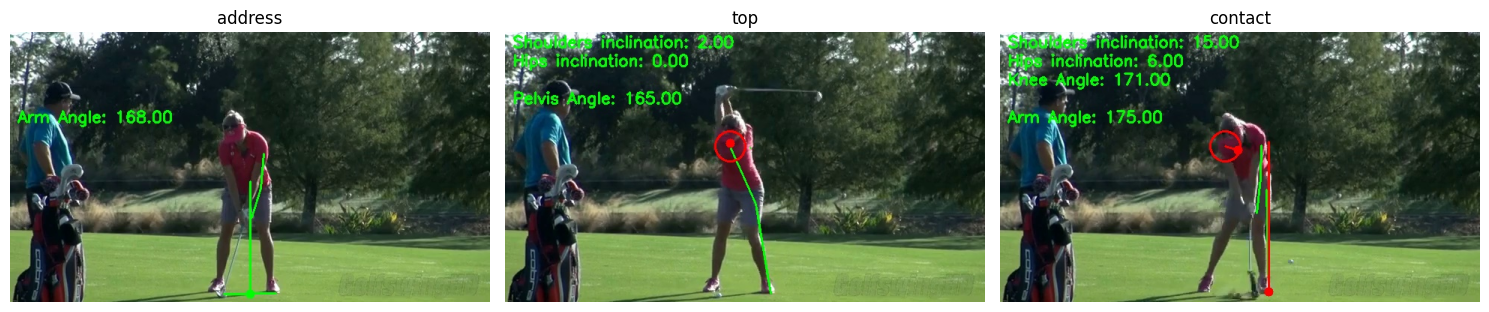

In [13]:

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
images = []

# Define the keywords for sorting
keywords = ['address', 'top', 'contact']
def extract_keyword_index(filename):
    filename_lower = filename.lower()
    for idx, keyword in enumerate(keywords):
        if keyword in filename_lower:
            return idx
    return len(keywords)  # Assign a higher index if keyword not found

sorted_image_files = sorted(image_files, key=lambda x: extract_keyword_index(x))
images = []

# Read each image and append it to the list
for image_file in sorted_image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    # Convert BGR to RGB format for display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

# Create a figure to display the images
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Display each image in its respective subplot
for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title(f'{sorted_image_files[i].split("_")[-1].split(".")[0]}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()
video_processor.print_swing_analysis()